In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df = pd.read_csv('car_prices.csv')

In [5]:
df_copy = pd.read_csv('car_prices.csv')

In [6]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [8]:
# Assuming df is your DataFrame containing the dataset with features and target variable

# Convert text columns to lowercase using a lambda function
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.str.lower())

df.drop(columns=['vin','saledate','condition'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   state         558837 non-null  object 
 7   odometer      558743 non-null  float64
 8   color         558088 non-null  object 
 9   interior      558088 non-null  object 
 10  seller        558837 non-null  object 
 11  mmr           558799 non-null  float64
 12  sellingprice  558825 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 55.4+ MB


In [10]:
from sklearn.impute import SimpleImputer

# Define a function to impute missing values in a DataFrame
def impute_missing_values(df):
    # Impute missing values for numeric columns
    numeric_columns = ['odometer', 'mmr', 'sellingprice']
    numeric_imputer = SimpleImputer(strategy='median')
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    # Impute missing values for categorical columns
    categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

    return df

# Impute missing values in the dataset
df_imputed = impute_missing_values(df)

# Verify that there are no missing values remaining
print("Missing Values After Imputation:")
print(df_imputed.isnull().sum())


Missing Values After Imputation:
year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
dtype: int64


In [11]:
# Assuming 'df' is your DataFrame containing the numeric variables
numeric_variables = ['mmr', 'sellingprice', 'odometer']
numeric_stats = df[numeric_variables].describe()

print("Descriptive Statistics for Numeric Variables:")
print(numeric_stats)


Descriptive Statistics for Numeric Variables:
                 mmr   sellingprice       odometer
count  558837.000000  558837.000000  558837.000000
mean    13769.274180   13611.326356   68317.315359
std      9679.646165    9749.399466   53394.458135
min        25.000000       1.000000       1.000000
25%      7100.000000    6900.000000   28375.000000
50%     12250.000000   12100.000000   52254.000000
75%     18300.000000   18200.000000   99103.000000
max    182000.000000  230000.000000  999999.000000


In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store label encoders for each categorical column
label_encoders = {}

# Iterate over categorical columns and encode them in df
for column in df.select_dtypes(include=['object']):
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    # Store the label encoder for each column
    label_encoders[column] = label_encoder

# Now perform the same label encoding on df_merged
for column in df_merged.select_dtypes(include=['object']):
    # Check if the column was label encoded during training
    if column in label_encoders:
        # If so, use the corresponding label encoder to transform the column
        label_encoder = label_encoders[column]
        df_merged[column] = label_encoder.transform(df_merged[column])
 


NameError: name 'df_merged' is not defined

In [13]:
# Check if the "seller" column is in the label_encoders dictionary
if "seller" in label_encoders:
    print("Column: seller")
    print("Encoded Values:")
    for value, label in enumerate(label_encoders["seller"].classes_):
        print(f"  {value}: {label}")
else:
    print("Label encoder for 'seller' column not found in label_encoders dictionary.")



Column: seller
Encoded Values:
  0: 1 cochran of monroeville
  1: 1 for all auto sales
  2: 101motors
  3: 1360250 alberta ltd
  4: 1360250 alberta ltd.
  5: 138 auto inc
  6: 1428879 alberta ltd
  7: 143 auto sales inc
  8: 1479582 alberta ltd.
  9: 1491081 alberta inc.
  10: 1555357 alberta limited
  11: 1582529 alberta ltd
  12: 159191 canada inc
  13: 1764175 alberta ltd
  14: 1770144 alberta ltd
  15: 1813477 alberta ltd
  16: 1814099 alberta ltd
  17: 1995 first avenue station
  18: 1solution auto network llc
  19: 1st advantage fcu
  20: 1st canadian auto sales & service
  21: 1st capital finance
  22: 1st choice auto sales
  23: 1st choice automotive corp
  24: 1st choice credit union
  25: 1st choice money center
  26: 1st class auto
  27: 1st class imports llc
  28: 1st commercial
  29: 1st financial fcu
  30: 1st gear auto inc
  31: 1st liberty fcu
  32: 1st liberty federal credit union
  33: 1st mid america credit union
  34: 1st national bank of scotia
  35: 1st security o

In [168]:
df.head()

,year,make,model,trim,body,transmission,state,odometer,color,interior,seller,mmr,sellingprice
0,2015,32,715,1187,40,0,29,16639.0,43,1,7202,20500.0,21500.0
1,2015,32,715,1187,40,0,29,9393.0,43,0,7202,20800.0,21500.0
2,2014,5,11,279,37,0,29,1331.0,33,1,4978,31900.0,30000.0
3,2015,64,657,1617,37,0,29,14282.0,43,1,13795,27500.0,27750.0
4,2014,5,43,494,37,0,29,2641.0,33,1,4978,66000.0,67000.0


In [15]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['sellingprice'])  # Assuming 'sellingprice' is the target variable
y = df['sellingprice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regression model
rf_model_base = RandomForestRegressor()

# Fit Random Forest model to the data
rf_model_base.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model_base.feature_importances_

# Get the indices of features sorted by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Evaluate R-squared score for different number of features
best_r2_score = -np.inf
best_selected_features = None

for num_features in range(1, min(len(X.columns), 6)):  # Select from 1 to 5 features
    # Select the top num_features important features
    selected_features = X.columns[sorted_indices[:num_features]]
    
    # Train Random Forest Regression model with selected features
    rf_model_base.fit(X_train[selected_features], y_train)
    
    # Make predictions on the test set
    y_pred_rf = rf_model_base.predict(X_test[selected_features])
    
    # Evaluate R-squared score
    r2 = r2_score(y_test, y_pred_rf)
    
    # Update best R-squared score and selected features if improved
    if r2 > best_r2_score:
        best_r2_score = r2
        best_selected_features = selected_features

# Train Random Forest Regression model with the best selected features
rf_model_base.fit(X_train[best_selected_features], y_train)

# Make predictions on the test set
y_pred_rf = rf_model_base.predict(X_test[best_selected_features])

# Evaluate Random Forest Regression model performance using R-squared score
r2_score_rf_base= r2_score(y_test, y_pred_rf)



: 

In [171]:
mse = mean_squared_error(y_test, y_pred_rf)
rmse= np.sqrt(mse)
# mae = mean_absolute_error(y_test, y_pred_rf)
# print("Mean Absolute Error:", mae)
print("R-squared score for Random Forest Regression:", r2_score_rf_base)
print("Selected features:", best_selected_features)

print("Mean Squared Error:", mse)
print("R-squared score for Random Forest Regression:", r2_score_rf_base)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared score for Random Forest Regression: 0.9707562652090611
Selected features: Index(['mmr', 'odometer', 'seller', 'state', 'trim'], dtype='object')
Mean Squared Error: 2740148.1098661707
R-squared score for Random Forest Regression: 0.9713739022979221
Root Mean Squared Error (RMSE): 1655.3392733413204


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model_base, param_grid, cv=5, scoring='r2')

# Perform grid search
grid_search.fit(X_train[selected_features_rf], y_train)

# Get best hyperparameters
best_params = grid_search.best_params_


In [185]:
# Get the categorical columns present in the trained model
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Define the prediction function
def predict_price(features):
    # Map categorical features to label encoded values
    encoded_features = features.copy()
    for column in categorical_columns:
        if column in label_encoders:
            encoded_features[column] = label_encoders[column].transform([features[column]])[0]
    
    # # Ensure all required features are provided
    # if len(encoded_features) != len(X_train.columns):  # Excluding target variable column
    #     print("Incomplete feature set. Please provide values for all features.")
    #     return None

    # Convert feature dictionary to DataFrame with a single row
    feature_df = pd.DataFrame([encoded_features])

    # Predict price using the trained model
    predicted_price = rf_model_base.predict(feature_df)

    return float(predicted_price)


In [172]:
# Define a list of categorical columns
categorical_columns = list(label_encoders.keys())

# Define the prediction function
def predict_price(features):
    # Map categorical features to label encoded values
    encoded_features = features.copy()
    for column in categorical_columns:
        if column in label_encoders:
            encoded_features[column] = label_encoders[column].transform([features[column]])[0]
    
    # Ensure all required features are provided
    if len(encoded_features) != len(df.columns) - 1:  # Excluding target variable column
        print("Incomplete feature set. Please provide values for all features.")
        return None

    # Convert feature dictionary to DataFrame with a single row
    feature_df = pd.DataFrame([encoded_features])

    # Predict price using the trained model
    predicted_price = rf_model_base.predict(feature_df)

    return float(predicted_price)

In [189]:
predict_price({ 'mmr':20500.0,'odometer': 17000.0, 'seller':7202, 'state':29, 'trim':1187})

20696.0

In [187]:
predict_price({ 'mmr':20500.0,'odometer': 16639.0, 'seller':'kia motors america  inc', 'state':'ca', 'trim':'lx'})

ValueError: could not convert string to float: 'kia motors america  inc'

In [184]:
predict_price({'make': 'kia', 'model': 'sorento', 'year': 2015, 'trim':'lx', 'odometer': 16639.0, 'mmr':20500.0, 'seller':'kia motors america  inc', 'state':'ca', 'body':'suv','transmission':'automatic', 'color':'white','interior':'black'})

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- body
- color
- interior
- make
- model
- ...


# Sentiment Analysis Section

In [84]:
import numpy as np
import pandas as pd
#data=pd.read_csv('all_reviews.csv')
data = pd.read_csv('all_thirty_Reviews.csv')

data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Vehicle  5576 non-null   object
 1   Reviews  5576 non-null   object
dtypes: object(2)
memory usage: 87.3+ KB


In [85]:
import nltk
nltk.download('punkt')

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\myahs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\myahs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\myahs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [86]:
import ast  # For safely evaluating strings containing Python literals

def extract_ratings_and_reviews(review_str):
    try:
        # Convert the string representation of the list of dictionaries into an actual list of dictionaries
        reviews = ast.literal_eval(review_str)

        # Extract 'Rating Count' and 'Review Body' from each dictionary
        rating_counts = [float(review.get('Rating Count')) for review in reviews]
        review_bodies = [review.get('Review Body') for review in reviews]

        return rating_counts, review_bodies
    except ValueError as e:
        # Return None or some default value if parsing fails
        print(f"Error parsing reviews: {e}")
        return None, None

# Apply the function to each row in your DataFrame and create new columns
data['Rating Counts'], data['Review Bodies'] = zip(*data['Reviews'].apply(lambda x: extract_ratings_and_reviews(x) if pd.notnull(x) else ([], [])))



In [87]:
from typing import List
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Set of English stopwords
stop_words = set(stopwords.words('english'))

def clean_review_text(text: str) -> str:
    # Remove punctuation, make lowercase, and tokenize
    text = re.sub(r'[^\w\s]', '', text).lower()
    tokens = word_tokenize(text)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if not word in stop_words]

    # Re-join tokens into a string
    cleaned_text = ' '.join(filtered_tokens)

    # Additional cleaning steps if necessary
    cleaned_text = re.sub(r'http\S+', '', cleaned_text)  # Remove URLs
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()  # Remove extra whitespaces

    return cleaned_text

def clean_reviews(reviews: List[str]) -> List[str]:
    return [clean_review_text(review) for review in reviews]

# Assuming df is your DataFrame and it has a 'Review Bodies' column that needs to be cleaned
data['Cleaned Review Bodies'] = data['Review Bodies'].apply(clean_reviews)



In [88]:
from textblob import TextBlob

# Assume df is your DataFrame with 'Rating Counts' and 'Review Bodies'
def calculate_sentiment(review):
    return TextBlob(review).sentiment.polarity

# Calculate sentiment for each review in 'Review Bodies'
data['Sentiment Scores'] = data['Cleaned Review Bodies'].apply(lambda reviews: [calculate_sentiment(review) for review in reviews])

# Compare sentiment scores with 'Rating Counts' and categorize
def categorize_rating(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'




In [90]:
from textblob import TextBlob


# Function to calculate sentiment for a single review
def calculate_sentiment(review):
    return TextBlob(review).sentiment.polarity

# Function to apply sentiment calculation to each review within the lists in 'Cleaned Review Bodies'
def calculate_sentiments(reviews_list):
    return [calculate_sentiment(review) for review in reviews_list]

# Apply the function to each list of reviews in the DataFrame to get a list of sentiment scores
data['Sentiment Scores'] = data['Cleaned Review Bodies'].apply(calculate_sentiments)


In [92]:
data.head()

,Vehicle,Reviews,Rating Counts,Review Bodies,Cleaned Review Bodies,Sentiment Scores
0,Nissan-Altima-2015,"[{'Rating Count': '5.0', 'Review Body': 'Bough...","[5.0, 1.0, 5.0, 2.0, 3.0, 4.0, 4.0, 1.0, 3.0, ...",['Bought model S at online auction. The car is...,[bought model online auction car fantastic 190...,"[0.17159090909090907, 0.0, 0.725, -0.16, 0.0, ..."
1,BMW-M5-2014,"[{'Rating Count': '5.0', 'Review Body': 'The M...","[5.0, 5.0, 5.0, 5.0, 1.0, 5.0, 5.0, 5.0, 5.0, ...","['The M5 is a head-turning, luxury sports seda...",[m5 headturning luxury sports sedan delivers a...,"[0.25, 0.3333333333333333, 0.4083333333333333,..."
2,Kia-Sorento-2015,"[{'Rating Count': '4.0', 'Review Body': ""Perfo...","[4.0, 1.0, 5.0, 4.0, 1.0, 5.0, 1.0, 5.0, 5.0, ...","[""Performs nicely, cleanly, simply, low mainte...",[performs nicely cleanly simply low maintenanc...,"[0.21999999999999997, -0.4930555555555555, 0.0..."
3,Volvo-S60-2015,"[{'Rating Count': '5.0', 'Review Body': 'I lov...","[5.0, 1.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",['I love my 2015 S60. I have driven it for fou...,[love 2015 s60 driven four years bought 3 year...,"[0.3714285714285714, 0.1, 0.16, 0.423809523809..."
4,BMW-6 Series Gran Coupe-2014,[],[],[],[],[]


In [41]:
def categorize_list_scores(scores):
    """Apply categorize_sentiment to each score in a list."""
    return [categorize_sentiment(score) for score in scores]

def categorize_list_ratings(ratings):
    """Apply categorize_rating to each rating in a list."""
    return [categorize_rating(rating) for rating in ratings]

# Apply the functions to each list in the DataFrame
data['Sentiment Categories'] = data['Sentiment Scores'].apply(categorize_list_scores)
data['Rating Categories'] = data['Rating Counts'].apply(categorize_list_ratings)

# Example of calculating match for the first list of scores and ratings
data['Match'] = data.apply(lambda x: [sc == rc for sc, rc in zip(x['Sentiment Categories'], x['Rating Categories'])], axis=1)
data['Accuracy'] = data['Match'].apply(lambda matches: sum(matches) / len(matches) if matches else None)

In [112]:
## import pandas as pd
from textblob import TextBlob

# Assuming data is your DataFrame


# Convert 'Review Bodies' column to strings
data['Review Bodies'] = data['Review Bodies'].astype(str)

# Define the calculate_sentiment function
def calculate_sentiment(review):
    return TextBlob(review).sentiment.polarity



# Calculate the average sentiment score for each vehicle
#data['Average Sentiment Score'] = data.groupby('Vehicle')['Sentiment Scores'].transform('mean')
data['Average Sentiment Score'] = data['Sentiment Scores'].apply(lambda x: np.mean(x))

data.head()
# Example output
print(data[['Vehicle', 'Average Sentiment Score']])


                           Vehicle  Average Sentiment Score
0               Nissan-Altima-2015                 0.180292
1                      BMW-M5-2014                 0.316619
2                 Kia-Sorento-2015                 0.274831
3                   Volvo-S60-2015                 0.372500
4     BMW-6 Series Gran Coupe-2014                      NaN
...                            ...                      ...
5571      Toyota-Land Cruiser-1998                      NaN
5572                   BMW-M5-2009                 0.219583
5573            Subaru-Legacy-2015                 0.385017
5574                Volvo-S80-2015                 0.251587
5575                   BMW-M5-2001                 0.322768

[5576 rows x 2 columns]


C:\Users\myahs\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\myahs\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [117]:
# Assuming df is your DataFrame containing the dataset with features and target variable

# Convert text columns to lowercase using a lambda function
#df_copy[df_copy.select_dtypes(include=['object']).columns] = df_copy.select_dtypes(include=['object']).apply(lambda x: x.str.lower())

# Now proceed with label encoding or other preprocessing steps


df_copy.drop(columns=['vin','saledate','condition'], inplace=True)
from sklearn.impute import SimpleImputer

# Define a function to impute missing values in a DataFrame
def impute_missing_values(df):
    # Impute missing values for numeric columns
    numeric_columns = ['odometer', 'mmr', 'sellingprice']
    numeric_imputer = SimpleImputer(strategy='median')
    df_copy[numeric_columns] = numeric_imputer.fit_transform(df_copy[numeric_columns])

    # Impute missing values for categorical columns
    categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df_copy[categorical_columns] = categorical_imputer.fit_transform(df_copy[categorical_columns])

    # Impute missing values for 'saledate' column
    # Replace missing dates with a special value like 'Unknown' or remove those rows
    # For example, to remove rows with missing 'saledate':
    # df.dropna(subset=['saledate'], inplace=True)

    return df

# Impute missing values in the dataset
df_imputed = impute_missing_values(df_copy)

# Verify that there are no missing values remaining


KeyError: "['vin', 'saledate', 'condition'] not found in axis"

In [132]:
# Make a copy of the main dataset
df_main_copy = df_copy.copy()

# Create a combined identifier column in the copy of the main dataset
df_main_copy['Vehicle'] = df_main_copy['make'] + '-' + df_main_copy['model'] + '-' + df_main_copy['year'].astype(str)

# Merge the copied main dataset with the sentiment analysis results
df_merged = pd.merge(df_main_copy, data, on='Vehicle', how='left')


In [136]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the dataset with features and target variable

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over categorical columns and encode them
for column in df_merged.select_dtypes(include=['object']):
    df_merged[column] = label_encoder.fit_transform(df_merged[column])

# Now df contains encoded numerical values for categorical columns

# # Split the data into features (X) and target variable (y)
# X = df.drop(columns=['sellingprice'])  # Assuming 'sellingprice' is the target variable
# y = df['sellingprice']

# Now proceed with splitting the data into training and testing sets, and train the Random Forest Regression model as shown in the previous example


In [135]:


# Impute missing values in the average sentiment score column with the mean or median
imputed_mean = df_merged['Average Sentiment Score'].mean()
df_merged['Average Sentiment Score'].fillna(imputed_mean, inplace=True)

df_merged.info()
# Or use median:
# imputed_median = df_merged['Average Sentiment Score'].median()
# df_merged['Average Sentiment Score'].fillna(imputed_median, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   year                     558837 non-null  int64  
 1   make                     558837 non-null  object 
 2   model                    558837 non-null  object 
 3   trim                     558837 non-null  object 
 4   body                     558837 non-null  object 
 5   transmission             558837 non-null  object 
 6   state                    558837 non-null  object 
 7   odometer                 558837 non-null  float64
 8   color                    558837 non-null  object 
 9   interior                 558837 non-null  object 
 10  seller                   558837 non-null  object 
 11  mmr                      558837 non-null  float64
 12  sellingprice             558837 non-null  float64
 13  Average Sentiment Score  558837 non-null  float64
dtypes: f

In [137]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df_merged.drop(columns=['sellingprice'])
y = df_merged['sellingprice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Include the sentiment score as a feature in the training set
X_train_with_sentiment = X_train.copy()
X_train_with_sentiment['Sentiment Score'] = df_merged.loc[X_train.index, 'Average Sentiment Score']

# Initialize Random Forest Regression model
rf_model = RandomForestRegressor()

# Fit Random Forest model to the data including the sentiment score
rf_model.fit(X_train_with_sentiment, y_train)

# Make predictions on the test set
X_test_with_sentiment = X_test.copy()
X_test_with_sentiment['Sentiment Score'] = df_merged.loc[X_test.index, 'Average Sentiment Score']
y_pred_rf = rf_model.predict(X_test_with_sentiment)

# Evaluate Random Forest Regression model performance using R-squared score
r2_score_rf = r2_score(y_test, y_pred_rf)
print("R-squared score for Random Forest Regression with sentiment score:", r2_score_rf)


R-squared score for Random Forest Regression with sentiment score: 0.9713739022979221


In [139]:
mse_sentiment = mean_squared_error(y_test, y_pred_rf)
rmse_sentiment= np.sqrt(mse)

print("Mean Squared Error:", mse_sentiment)

print("Root Mean Squared Error (RMSE):", rmse_sentiment)

Mean Squared Error: 2682275.3000583663
Root Mean Squared Error (RMSE): 1654.3687612816022


In [134]:
# Drop the specified columns
df_merged = df_merged.drop(columns=['Vehicle', 'Reviews', 'Rating Counts', 'Review Bodies', 'Cleaned Review Bodies', 'Sentiment Scores'])


In [151]:
# def adjust_price_with_sentiment(inputted_make, inputted_model, inputted_year):
#     base_price = predict_base_price(inputted_make, inputted_model, inputted_year)
    
#     # Get the average sentiment score from the 'data' DataFrame
#     average_sentiment_score = df_merged.loc[(d['Vehicle'] == f"{inputted_make}-{inputted_model}-{inputted_year}"), 'Average Sentiment Score'].values[0]

#     # Define the maximum percentage increase/decrease allowed
#     max_percentage_change = 5  # 5% increase or decrease
    
#     # Convert the sentiment score to a percentage change within the specified range
#     if average_sentiment_score > 0:
#         adjustment_factor = 1 + min(10*average_sentiment_score / 100, max_percentage_change / 100)
#         # Increase price, capped at maximum percentage change
#     elif average_sentiment_score < 0:
#         adjustment_factor = 1 - min(abs(10*average_sentiment_score / 100), max_percentage_change / 100)
#         # Decrease price, capped at maximum percentage change
#     else:
#         adjustment_factor = 1  # No adjustment if sentiment score is neutral

#     adjusted_price = base_price * adjustment_factor
    
#     print("Base Price:", base_price)
#     print("Average Sentiment Score:", average_sentiment_score)
#     print("Adjustment Factor:", adjustment_factor)
#     print("Adjusted Price:", adjusted_price)


def adjust_price_with_sentiment(inputted_make, inputted_model, inputted_year):
    base_price = predict_base_price(inputted_make, inputted_model, inputted_year)
    
    # Get the average sentiment score from the 'df_merged' DataFrame
    row = df_merged[(df_merged['make'] == inputted_make) & 
                    (df_merged['model'] == inputted_model) & 
                    (df_merged['year'] == inputted_year)]
    
    if len(row) == 0:
        print("Data not found for the specified vehicle.")
        return
    
    average_sentiment_score = row['Average Sentiment Score'].iloc[0]

    # Define the maximum percentage increase/decrease allowed
    max_percentage_change = 5  # 5% increase or decrease
    
    # Convert the sentiment score to a percentage change within the specified range
    if average_sentiment_score > 0:
        adjustment_factor = 1 + min(10 * average_sentiment_score / 100, max_percentage_change / 100)
        # Increase price, capped at maximum percentage change
    elif average_sentiment_score < 0:
        adjustment_factor = 1 - min(abs(10 * average_sentiment_score / 100), max_percentage_change / 100)
        # Decrease price, capped at maximum percentage change
    else:
        adjustment_factor = 1  # No adjustment if sentiment score is neutral

    adjusted_price = base_price * adjustment_factor
    
    print("Base Price:", base_price)
    print("Average Sentiment Score:", average_sentiment_score)
    print("Adjustment Factor:", adjustment_factor)
    print("Adjusted Price:", adjusted_price)



In [154]:
print("Positive Sentiment Score")
predict_price({'make': 'Kia', 'model': 'Sorento', 'year': 2015})


Positive Sentiment Score


NameError: name 'categorical_columns' is not defined

In [96]:
min_avg_sentiment_score = data['Average Sentiment Score'].min()
max_avg_sentiment_score = data['Average Sentiment Score'].max()

print("Minimum Average Sentiment Score:", min_avg_sentiment_score)
print("Maximum Average Sentiment Score:", max_avg_sentiment_score)


Minimum Average Sentiment Score: -0.24851851851851847
Maximum Average Sentiment Score: 0.8000000000000002


In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Let's assume 'data' is your original DataFrame with columns 'Vehicle', 'Rating Counts', 'Sentiment Scores', and 'Review Bodies'

# Expand the DataFrame to include review bodies
rows = []
for _, row in df_copy.iterrows():
    vehicle = row['Vehicle']
    rating_counts = row['Rating Counts']
    sentiment_scores = row['Sentiment Scores']
    review_bodies = row['Cleaned Review Bodies']
    for rating, sentiment, review_body in zip(rating_counts, sentiment_scores, review_bodies):
        rows.append({'Vehicle': vehicle, 'Rating Counts': rating, 'Sentiment Scores': sentiment, 'Cleaned Review Bodies': review_body})
expanded_df = pd.DataFrame(rows)

# Display the expanded DataFrame
print(expanded_df.head())





              Vehicle  Rating Counts  Sentiment Scores  \
0  Nissan-Altima-2015            5.0          0.171591   
1  Nissan-Altima-2015            1.0          0.000000   
2  Nissan-Altima-2015            5.0          0.725000   
3  Nissan-Altima-2015            2.0         -0.160000   
4  Nissan-Altima-2015            3.0          0.000000   

                               Cleaned Review Bodies  
0  bought model online auction car fantastic 190k...  
1  transmission nissan installed believe dealersh...  
2  altima fully sport pkg sunroof climate control...  
3  price high almost 16000 it500 dollors month ca...  
4  bought 25s altima 1 year ago transmission repl...  


In [146]:
# Count the number of reviews in each sentiment category
sentiment_counts = expanded_df['Sentiment Category'].value_counts()

# Determine the highest, lowest, and median sentiment scores
highest_score = expanded_df['Sentiment Scores'].max()
lowest_score = expanded_df['Sentiment Scores'].min()
median_score = expanded_df['Sentiment Scores'].median()

print("Sentiment Counts:")
print(sentiment_counts)
print("\nHighest Sentiment Score:", highest_score)
print("Lowest Sentiment Score:", lowest_score)
print("Median Sentiment Score:", median_score)


Sentiment Counts:
Sentiment Category
Positive    79063
Negative     6616
Neutral      3244
Name: count, dtype: int64

Highest Sentiment Score: 1.0
Lowest Sentiment Score: -1.0
Median Sentiment Score: 0.2875


In [160]:
# Define function to map sentiment scores to sentiment categories
def map_to_sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Map sentiment scores to sentiment categories
expanded_df['Sentiment Category'] = expanded_df['Sentiment Scores'].apply(map_to_sentiment_category)

# Define function to map ratings to sentiment categories
def map_rating_to_sentiment_category(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Map ratings to sentiment categories
expanded_df['Actual Sentiment Category'] = expanded_df['Rating Counts'].apply(map_rating_to_sentiment_category)

# Calculate confusion matrix
confusion_matrix = pd.crosstab(expanded_df['Actual Sentiment Category'], expanded_df['Sentiment Category'])

# Calculate accuracy
accuracy = (confusion_matrix['Positive']['Positive'] + confusion_matrix['Neutral']['Neutral'] + confusion_matrix['Negative']['Negative']) / len(expanded_df)

print("Confusion Matrix:")
print(confusion_matrix)
print("Accuracy:", accuracy)


Confusion Matrix:
Sentiment Category         Negative  Neutral  Positive
Actual Sentiment Category                             
Negative                       2445      418      3194
Neutral                        1007      212      3748
Positive                       3524     1764     72611
Accuracy: 0.8464401785814694


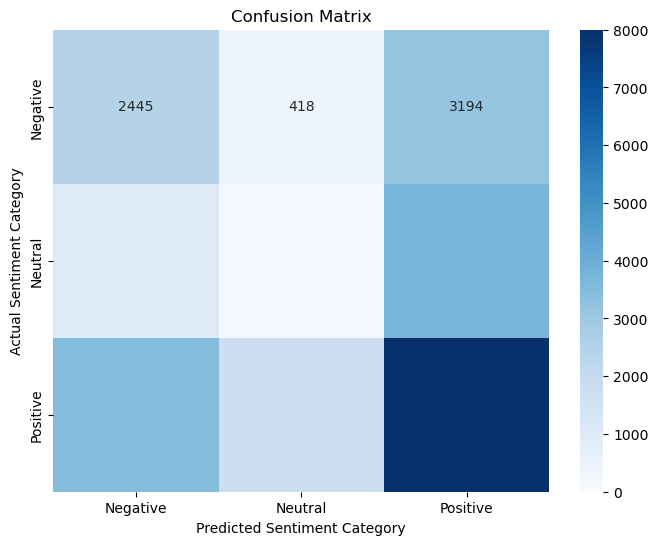

In [161]:
import seaborn as sns

# Plot the confusion matrix as a heatmap with adjusted scale
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', vmin=0, vmax=8000)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment Category')
plt.ylabel('Actual Sentiment Category')
plt.show()


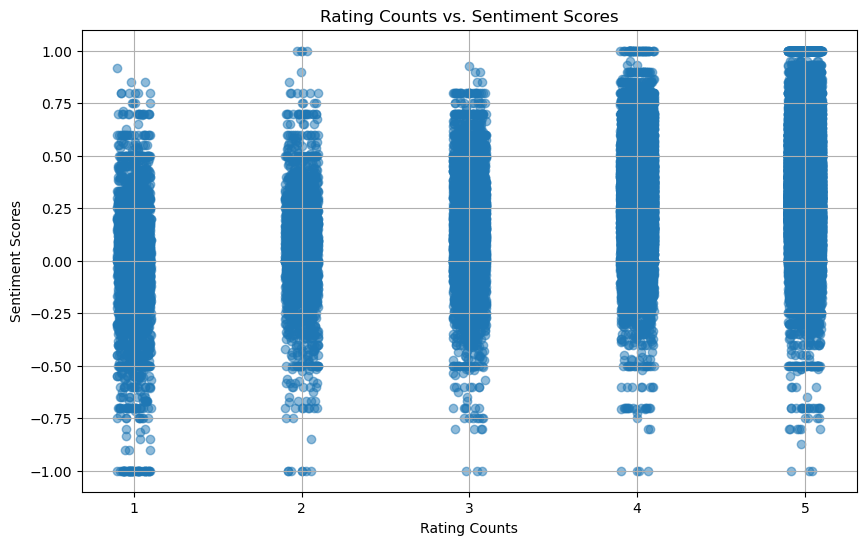

In [148]:
ratings = expanded_df['Rating Counts'].values
# Extract the 'Sentiment Scores' as an array-like object
sentiment_scores = expanded_df['Sentiment Scores'].values

# Add jitter to the ratings for plotting
ratings_jittered = ratings + np.random.uniform(-0.1, 0.1, size=len(ratings))

# Plot with jitter and alpha for transparency
plt.figure(figsize=(10, 6))
plt.scatter(ratings_jittered, sentiment_scores, alpha=0.5)
plt.xlabel('Rating Counts')
plt.ylabel('Sentiment Scores')
plt.title('Rating Counts vs. Sentiment Scores')
plt.grid(True)
plt.show()

# Scatter PLot Analysis
The scatter plot shows sentiment scores for reviews across a 1-to-5 rating system. Notably, while lower ratings (1's and 2's) predominantly have negative sentiment scores, as one would expect, there are still a considerable number of reviews at these rating levels with positive sentiment scores.

This could occur for several reasons:

Mixed Feedback: A review could contain both negative and positive comments, such as praising certain features while criticizing others. Sentiment analysis might pick up on the positive aspects, resulting in a higher sentiment score.

Reviewer Tendencies: Some users may use a harsh rating scale but still use positive language, or they might add a positive note to a generally negative review, such as acknowledging a single good feature in an otherwise disappointing product.

Sentiment Analysis Nuances: Sentiment analysis tools, like TextBlob used here, might interpret certain phrases or words as positive even within a largely critical context, leading to higher sentiment scores for low ratings.

Data Entry Errors: There could be inconsistencies where reviewers mistakenly select the wrong rating or provide a review that doesn't align with the rati given.

.

NMF Topics:
Topic 0:
car recommend looking buy amazing time want fast perfect price
Topic 1:
mile year bought problem new oil engine issue transmission used
Topic 2:
vehicle family recommend suv purchased looking purchase excellent highly dependable
Topic 3:
great run look value snow handle price performance condition money
Topic 4:
good really price nice value look condition pretty looking run
Topic 5:
need met meet family work expectation space fit perfect legroom
Topic 6:
room plenty leg lot family space trunk seat kid cargo
Topic 7:
truck cab bed looking work ranger ford tow towing trailer
Topic 8:
love absolutely kid way style color im look bought jeep
Topic 9:
owned ive best year far driven performance bmw value money
Topic 10:
drive fun easy wheel lot fast snow super convertible handle
Topic 11:
seat ride comfortable nice smooth interior power feature heated leather
Topic 12:
gas mileage better low highway excellent decent mpg tank city
Topic 13:
like new look feel really handle

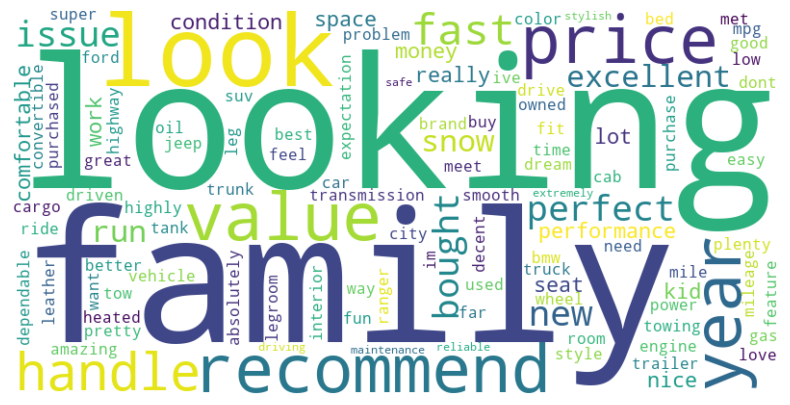

In [96]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to display NMF topics
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

def display_topics(model, feature_names, no_top_words):
    all_words = []
    for topic_idx, topic in enumerate(model.components_):
        all_topic_words = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(f"Topic {topic_idx}:")
        print(all_topic_words)
        all_words.append(all_topic_words)
    all_words_str = " ".join(all_words)
    generate_wordcloud(all_words_str, "")

# Load stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing and removing stopwords
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)  # Join tokens into a single string

# Preprocess review bodies
expanded_df['Cleaned Text'] = expanded_df['Cleaned Review Bodies'].apply(preprocess_text)

# Create TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(expanded_df['Cleaned Text'])

# Define number of topics and components
no_topics = 15
no_top_words = 10

# Fit NMF model
nmf_model = NMF(n_components=no_topics, random_state=1, init='nndsvd')
nmf_W = nmf_model.fit_transform(tfidf)
nmf_H = nmf_model.components_

# Display topics
print("NMF Topics:")
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)


# Analysis
The word cloud vividly encapsulates the prevalent sentiments within car reviews, showcasing the terms most frequently mentioned by consumers. Dominant in the visualization are words like "family," "recommend," and "comfortable," which point to a strong appreciation for vehicles that cater to family needs and comfort. Terms such as "value," "performance," and "reliable" are also prominently featured, indicating that practical performance metrics are central to customer satisfaction. The presence of emotive words like "love," "perfect," and "fun" alongside practical descriptors like "gas," "mileage," and "maintenance" reveals a balanced sentiment where emotional satisfaction intersects with functional appraisal. The large, central placement of "recommend" suggests a willingness among satisfied customers to endorse their vehicles to others. This word cloud, in summary, portrays a positive consumer landscape where the quality, utility, and emotional fulfillment derived from these vehicles are openly celebrated and are likely influential in guiding prospective buyers.s.

LDA Topics 

Topic 0:
manual second trouble traded mazda offer college model transmission business
Topic 1:
cylinder haul spot liter bed difficult boat blind engine cyl
Topic 2:
seat control heated leather radio window rear steering door roof
Topic 3:
mitsubishi ranger eclipse vette blazer hauled galant titan tuned sequoia
Topic 4:
car great gas good mileage reliable comfortable vehicle mpg need
Topic 5:
seat car room great lot comfortable love plenty space good
Topic 6:
truck vehicle suv van winter road snow test drive weather
Topic 7:
driven expensive cheap tire gone mph dodge coolant failure speed
Topic 8:
car drive like great fun handle love interior look feel
Topic 9:
jeep wear tear mi research cherokee lucky wrangler la changer
Topic 10:
volvo wish loaded fully load mustang provides compare chevrolet volvos
Topic 11:
car year mile bought ive new owned like vehicle used
Topic 12:
mile problem engine oil car transmission replaced issue time year
Topic 13:
let paint longer gm ford c

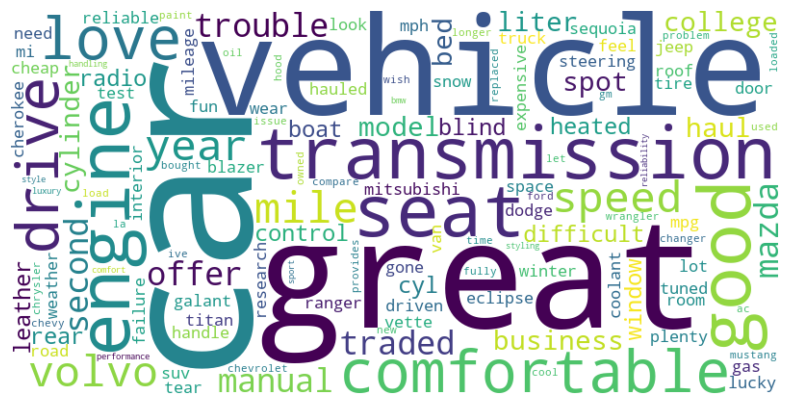

In [101]:
# LDA
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(expanded_df['Cleaned Text'])
tf_feature_names = tf_vectorizer.get_feature_names_out()
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_
no_top_words = 10
no_top_documents = 4
print("LDA Topics \n")
display_topics(lda_model, tf_feature_names, no_top_words)


In [193]:
expanded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88923 entries, 0 to 88922
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Vehicle                    88923 non-null  object 
 1   Rating Counts              88923 non-null  float64
 2   Sentiment Scores           88923 non-null  float64
 3   Cleaned Review Bodies      88923 non-null  object 
 4   Sentiment Category         88923 non-null  object 
 5   Actual Sentiment Category  88923 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.1+ MB
